
📘 Simple Linear Regression
MAE: 0.637
MSE: 0.738
R²: 0.465

📗 Multiple Linear Regression
MAE: 0.611
MSE: 0.683
R²: 0.505


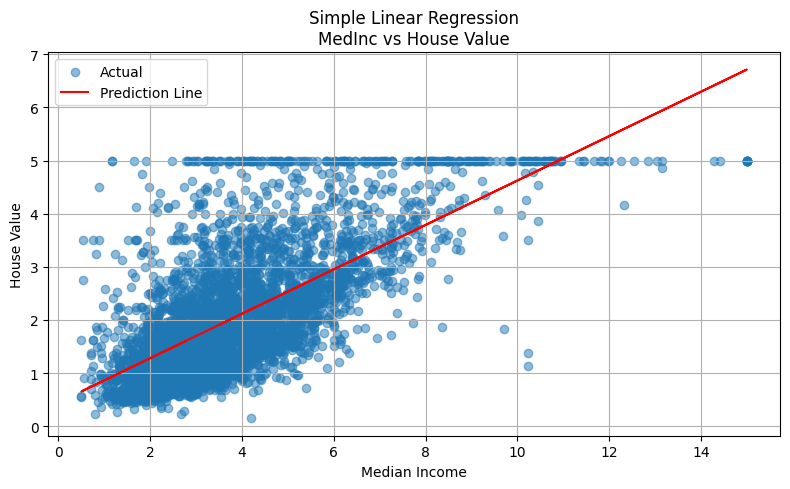


📌 Simple Model Coefficients:
Intercept: 0.446
MedInc Coef: 0.418

📌 Multiple Model Coefficients:
Intercept: -0.095
MedInc: 0.431
HouseAge: 0.017


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = fetch_california_housing(as_frame=True)
df = data.frame


X_simple = df[['MedInc']]
X_multiple = df[['MedInc', 'HouseAge']]
y = df['MedHouseVal']


X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=40)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multiple, y, test_size=0.2, random_state=40)


model_s = LinearRegression().fit(X_train_s, y_train_s)
model_m = LinearRegression().fit(X_train_m, y_train_m)


y_pred_s = model_s.predict(X_test_s)
y_pred_m = model_m.predict(X_test_m)

def evaluate(y_true, y_pred, name):
    print(f"\n{name}")
    print("MAE:", round(mean_absolute_error(y_true, y_pred), 3))
    print("MSE:", round(mean_squared_error(y_true, y_pred), 3))
    print("R²:", round(r2_score(y_true, y_pred), 3))

evaluate(y_test_s, y_pred_s, "📘 Simple Linear Regression")
evaluate(y_test_m, y_pred_m, "📗 Multiple Linear Regression")


plt.figure(figsize=(8,5))
plt.scatter(X_test_s, y_test_s, label='Actual', alpha=0.5)
plt.plot(X_test_s, y_pred_s, color='red', label='Prediction Line')
plt.title("Simple Linear Regression\nMedInc vs House Value")
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


print("\n📌 Simple Model Coefficients:")
print("Intercept:", round(model_s.intercept_, 3))
print("MedInc Coef:", round(model_s.coef_[0], 3))

print("\n📌 Multiple Model Coefficients:")
print("Intercept:", round(model_m.intercept_, 3))
for name, coef in zip(X_multiple.columns, model_m.coef_):
    print(f"{name}: {round(coef, 3)}")